In [14]:
import xarray as xr
import rioxarray as rxr
from rioxarray.merge import merge_arrays
import pandas as pd
import numpy as np
from sen12mscrts_manager import Sen12mscrtsDatasetManager
import datatree
from tqdm import tqdm
from os.path import join
import dask
from s2cloudless import S2PixelCloudDetector

In [15]:
root_dir='/media/vlad/Extreme SSD/Datasets/Cloud_removal/SEN12MS-CR-TS/test/asiaWest_test/'
example_s1_image='/media/vlad/Extreme SSD/Datasets/Cloud_removal/SEN12MS-CR-TS/test/asiaWest_test/ROIs1868/100/S1/12/s1_ROIs1868_100_ImgNo_12_2018-05-27_patch_186.tif'
example_s1_tile='/media/vlad/Extreme SSD/Datasets/Cloud_removal/SEN12MS-CR-TS/test/asiaWest_test/ROIs1868/100/S1/12/'
example_s2_image='/media/vlad/Extreme SSD/Datasets/Cloud_removal/SEN12MS-CR-TS/test/asiaWest_test/ROIs1868/100/S2/12/s2_ROIs1868_100_ImgNo_12_2018-05-30_patch_186.tif'
example_s2_tile='/media/vlad/Extreme SSD/Datasets/Cloud_removal/SEN12MS-CR-TS/test/asiaWest_test/ROIs1868/100/S2/12'

In [5]:
from dask.distributed import Client
client = Client(processes=True)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 4,Total memory: 15.54 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:41339,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 15.54 GiB
Comm: tcp://127.0.0.1:46137,Total threads: 1
Dashboard: http://127.0.0.1:46101/status,Memory: 3.89 GiB
Nanny: tcp://127.0.0.1:33391,


# Load new manager

In [16]:
manager = Sen12mscrtsDatasetManager(
    root_dir='/media/vlad/Extreme SSD/Datasets/Cloud_removal/SEN12MS-CR-TS/test/asiaWest_test/',
)

In [18]:
manager.load_dataset()

100%|██████████████████████████████████| 20717/20717 [00:01<00:00, 15637.13it/s]


In [24]:
pd.set_option('display.max_columns', 1000)

In [27]:
manager.data

modality                                                                     S1  \
ROI      tile patch timestep                                                      
ROIs1868 100  0     0         /media/vlad/Extreme SSD/Datasets/Cloud_removal...   
                    1         /media/vlad/Extreme SSD/Datasets/Cloud_removal...   
                    2         /media/vlad/Extreme SSD/Datasets/Cloud_removal...   
                    3         /media/vlad/Extreme SSD/Datasets/Cloud_removal...   
                    4         /media/vlad/Extreme SSD/Datasets/Cloud_removal...   
...                                                                         ...   
              299   25        /media/vlad/Extreme SSD/Datasets/Cloud_removal...   
                    26        /media/vlad/Extreme SSD/Datasets/Cloud_removal...   
                    27        /media/vlad/Extreme SSD/Datasets/Cloud_removal...   
                    28        /media/vlad/Extreme SSD/Datasets/Cloud_removal...   
                    29        /media/vlad/Extreme SSD/Datasets/Cloud_removal...   

modality                                                                     S2  
ROI      tile patch timestep                                                     
ROIs1868 100  0     0         /media/vlad/Extreme SSD/Datasets/Cloud_removal...  
                    1         /media/vlad/Extreme SSD/Datasets/Cloud_removal...  
                    2         /media/vlad/Extreme SSD/Datasets/Cloud_removal...  
                    3         /media/vlad/Extreme SSD/Datasets/Cloud_removal...  
                    4         /media/vlad/Extreme SSD/Datasets/Cloud_removal...  
...                                                                         ...  
              299   25        /media/vlad/Extreme SSD/Datasets/Cloud_removal...  
                    26        /media/vlad/Extreme SSD/Datasets/Cloud_removal...  
                    27        /media/vlad/Extreme SSD/Datasets/Cloud_removal...  
                    28        /media/vlad/Extreme SSD/Datasets/Cloud_removal...  
                    29        /media/vlad/Extreme SSD/Datasets/Cloud_removal...  

[9000 rows x 2 columns]

In [12]:
manager.data["ROIs1868/100/12/"]["S2"].transpose("band", "lat", "lon", "timestep")

<xarray.DataArray 'S2' (band: 13, lat: 256, lon: 256, timestep: 30)>
dask.array<transpose, shape=(13, 256, 256, 30), dtype=uint16, chunksize=(13, 256, 256, 1), chunktype=numpy.ndarray>
Coordinates:
  * timestep     (timestep) int64 0 1 2 3 4 5 6 7 8 ... 22 23 24 25 26 27 28 29
  * lon          (lon) float64 28.96 28.96 28.96 28.96 ... 28.99 28.99 28.99
  * lat          (lat) float64 40.45 40.45 40.45 40.45 ... 40.43 40.43 40.43
    spatial_ref  int64 0
    y            (lat) int64 0 1 2 3 4 5 6 7 ... 248 249 250 251 252 253 254 255
    x            (lon) int64 0 1 2 3 4 5 6 7 ... 248 249 250 251 252 253 254 255
    date         (timestep) <U10 '2018-01-03' '2018-01-15' ... '2018-12-17'
    filepath     (timestep) <U147 '/media/vlad/Extreme SSD/Datasets/Cloud_rem...
    directory    (timestep) <U98 '/media/vlad/Extreme SSD/Datasets/Cloud_remo...
    filename     (timestep) <U48 's1_ROIs1868_100_ImgNo_0_2018-01-03_patch_12...
    patch        int64 12
  * band         (band) <U3 'B1' 'B2' 'B3' 'B4' 'B5' ... 'B9' 'B10' 'B11' 'B12'
Attributes:
    AREA_OR_POINT:             Area
    scale_factor:              1.0
    add_offset:                0.0
    modality:                  S2
    ROI:                       ROIs1868
    tile:                      100
    STATISTICS_VALID_PERCENT:  100

In [29]:
manager.data[]

<xarray.Dataset>
Dimensions:              (timestep: 30, polarization: 2, lon: 768, band: 13,
                          lat: 512)
Coordinates: (12/13)
  * timestep             (timestep) int64 0 1 2 3 4 5 6 ... 23 24 25 26 27 28 29
  * polarization         (polarization) <U2 'VV' 'VH'
  * lon                  (lon) float64 28.69 28.69 28.69 ... 28.99 28.99 28.99
  * band                 (band) <U3 'B1' 'B2' 'B3' 'B4' ... 'B10' 'B11' 'B12'
  * lat                  (lat) float64 40.36 40.36 40.36 ... 40.31 40.31 40.31
    spatial_ref          int64 0
    ...                   ...
    x                    (lon) float64 0.0 1.0 2.0 3.0 ... 253.0 254.0 255.0
    date                 (timestep) <U10 '2018-01-03' ... '2018-12-17'
    filepath             (lat, timestep, lon) object '/media/vlad/Extreme SSD...
    directory            (timestep) <U98 '/media/vlad/Extreme SSD/Datasets/Cl...
    filename             (lat, timestep, lon) object 's1_ROIs1868_100_ImgNo_0...
    patch                (lat, lon) float64 92.0 92.0 92.0 92.0 ... nan nan nan
Data variables:
    S1                   (timestep, lat, lon, polarization) float64 dask.array<chunksize=(1, 256, 256, 2), meta=np.ndarray>
    S2                   (timestep, lat, lon, band) float64 dask.array<chunksize=(1, 256, 256, 13), meta=np.ndarray>
    S2_cloud_map         (timestep, lat, lon) float64 dask.array<chunksize=(1, 256, 256), meta=np.ndarray>
    S2_cloud_percentage  (lat, lon, timestep) float64 dask.array<chunksize=(256, 256, 1), meta=np.ndarray>

In [19]:
child.ds["S2"]

<xarray.DataArray 'S2' (timestep: 30, lat: 256, lon: 256, band: 13)>
dask.array<concatenate, shape=(30, 256, 256, 13), dtype=uint16, chunksize=(1, 256, 256, 13), chunktype=numpy.ndarray>
Coordinates:
  * timestep     (timestep) int64 0 1 2 3 4 5 6 7 8 ... 22 23 24 25 26 27 28 29
  * lon          (lon) float64 29.13 29.13 29.13 29.13 ... 29.15 29.15 29.15
  * lat          (lat) float64 40.22 40.22 40.22 40.22 ... 40.2 40.2 40.2 40.2
    spatial_ref  int64 0
    y            (lat) int64 0 1 2 3 4 5 6 7 ... 248 249 250 251 252 253 254 255
    x            (lon) int64 0 1 2 3 4 5 6 7 ... 248 249 250 251 252 253 254 255
    date         (timestep) <U10 '2018-01-03' '2018-01-15' ... '2018-12-17'
    filepath     (timestep) <U148 '/media/vlad/Extreme SSD/Datasets/Cloud_rem...
    directory    (timestep) <U98 '/media/vlad/Extreme SSD/Datasets/Cloud_remo...
    filename     (timestep) <U49 's1_ROIs1868_100_ImgNo_0_2018-01-03_patch_21...
    patch        int64 219
  * band         (band) <U3 'B1' 'B2' 'B3' 'B4' 'B5' ... 'B9' 'B10' 'B11' 'B12'
Attributes:
    AREA_OR_POINT:             Area
    STATISTICS_VALID_PERCENT:  100
    scale_factor:              1.0
    add_offset:                0.0
    modality:                  S2
    ROI:                       ROIs1868
    tile:                      100

In [19]:
delayed_reader = dask.delayed(ImageReader)
delayed_reader

Delayed('ImageReader-95975345-7dcd-499a-a425-e95c40e13ce2')

In [20]:
delayed_manager = dask.delayed(manager)
delayed_manager

Delayed('Sen12mscrtsDatasetManager-db1206c0-f824-4584-895f-a87ee51e7e88')

In [21]:
delayed_reader = delayed_reader(
    manager=delayed_manager,
    directory="/media/vlad/Extreme SSD/Datasets/Cloud_removal/SEN12MS-CR-TS/test/asiaWest_test/ROIs1868/100/S2/12",
    filename="s2_ROIs1868_100_ImgNo_12_2018-05-30_patch_186.tif"
)
delayed_reader

Delayed('ImageReader-d1c635d5-bccd-4c24-bb63-a51d48a255dd')

In [22]:
delayed_reader = delayed_reader.load_lazy()
delayed_reader

Delayed('load_lazy-ccf78d03-0f81-4c38-a5e0-b0c4dee4f517')

In [23]:
list_of_delayed = [delayed_reader]

In [25]:
computed_reader = dask.compute(list_of_delayed)[0]
computed_reader

In [12]:
computed_reader

(<image.ImageReader at 0x7f14fcc0af10>,)

In [30]:
import importlib
importlib.reload(image)

NameError: name 'image' is not defined

# Load manager from file

In [3]:
manager = Sen12mscrtsDatasetManager(
    root_dir='/media/vlad/Extreme SSD/Datasets/Cloud_removal/SEN12MS-CR-TS/test/asiaWest_test/',
)

In [4]:
manager.load_from_file()

# Here we test the data loader

In [5]:
from ctgan_dataset import CTGANTorchDataset
from torch.utils.data import DataLoader
import torch

In [6]:
device = torch.device('cpu')
ctgan_dataset = CTGANTorchDataset(manager, device=device)

Converting dataset to training samples: 100%|█| 300/300 [00:57<00:00,  5.22it/s]


In [7]:
from dask.distributed import Client
client = Client(processes=True)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 4,Total memory: 15.54 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:40637,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 15.54 GiB
Comm: tcp://127.0.0.1:39389,Total threads: 1
Dashboard: http://127.0.0.1:33819/status,Memory: 3.89 GiB
Nanny: tcp://127.0.0.1:45079,


In [8]:
loader = DataLoader(
    ctgan_dataset, 
    batch_size=8, 
    shuffle=True, 
    collate_fn=ctgan_dataset.get_collate_fn()
)

In [9]:
for i, sample in enumerate(loader):
    if i>5:
        break
    
sample

(tensor([[[[1760., 1234., 1099.,  ...,   10., 2205., 1635.],
           [1953., 1146., 1113.,  ...,   13., 2300., 1620.],
           [1953., 1146., 1113.,  ...,   13., 2300., 1620.],
           ...,
           [1294.,  980.,  814.,  ...,   13., 1507.,  801.],
           [1294.,  977.,  806.,  ...,   13., 1507.,  801.],
           [1294.,  982.,  797.,  ...,   13., 1565.,  807.]],
 
          [[1760., 1532., 1306.,  ...,   10., 2035., 1596.],
           [1953., 2055., 1803.,  ...,   13., 1791., 1326.],
           [1953., 2055., 1803.,  ...,   13., 1791., 1326.],
           ...,
           [1294.,  965.,  792.,  ...,   13., 1507.,  801.],
           [1294.,  970.,  801.,  ...,   13., 1507.,  801.],
           [1294.,  986.,  818.,  ...,   13., 1565.,  807.]],
 
          [[1760., 1718., 1745.,  ...,   10., 2035., 1596.],
           [1953., 1761., 1974.,  ...,   13., 1791., 1326.],
           [1953., 1761., 1974.,  ...,   13., 1791., 1326.],
           ...,
           [1294.,  958.,  791.

Process Dask Worker process (from Nanny):
2023-02-03 19:45:42,517 - distributed.nanny - ERROR - Worker process died unexpectedly
Traceback (most recent call last):
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/vlad/PycharmProjects/TUC/Masterarbeit/projects/spatiotemporal/venv/lib/python3.8/site-packages/distributed/process.py", line 188, in _run
    target(*args, **kwargs)
  File "/home/vlad/PycharmProjects/TUC/Masterarbeit/projects/spatiotemporal/venv/lib/python3.8/site-packages/distributed/nanny.py", line 986, in _run
    asyncio.run(run())
  File "/usr/lib/python3.8/asyncio/runners.py", line 44, in run
    return loop.run_until_complete(main)
  File "/usr/lib/python3.8/asyncio/base_events.py", line 603, in run_until_complete
    self.run_forever()
  File "/usr/lib/python3.8/asyncio/base_events.py", line 

In [30]:
from matplotlib import pyplot as plt

In [41]:
original_ds = manager.data["ROIs1868/100/196"].copy()

In [42]:
original_ds.ds = (xr.Dataset)(original_ds).drop("S1")

original_ds["S2_t-1"] = original_ds["S2"].shift(timestep=+1)
original_ds["S2_t-2"] = original_ds["S2"].shift(timestep=+2)
original_ds["S2_t-3"] = original_ds["S2"].shift(timestep=+3)

original_ds["S2_cloud_map_t-1"] = original_ds["S2_cloud_map"].shift(timestep=+1)
original_ds["S2_cloud_map_t-2"] = original_ds["S2_cloud_map"].shift(timestep=-2)
original_ds["S2_cloud_map_t-3"] = original_ds["S2_cloud_map"].shift(timestep=-3)

original_ds = original_ds.isel(timestep=slice(3, 30))

original_ds = original_ds.drop_dims("polarization")

In [43]:
original_ds.sel

DataTree('196', parent=None)
    Dimensions:              (timestep: 27, lon: 256, lat: 256, band: 13)
    Coordinates:
      * timestep             (timestep) int64 3 4 5 6 7 8 9 ... 23 24 25 26 27 28 29
      * lon                  (lon) float64 29.06 29.06 29.06 ... 29.08 29.08 29.08
      * lat                  (lat) float64 40.24 40.24 40.24 ... 40.22 40.22 40.22
        spatial_ref          int64 0
        y                    (lat) int64 0 1 2 3 4 5 6 ... 250 251 252 253 254 255
        x                    (lon) int64 0 1 2 3 4 5 6 ... 250 251 252 253 254 255
        date                 (timestep) <U10 '2018-02-08' ... '2018-12-17'
        filepath             (timestep) <U148 '/media/vlad/Extreme SSD/Datasets/C...
        directory            (timestep) <U98 '/media/vlad/Extreme SSD/Datasets/Cl...
        filename             (timestep) <U49 's1_ROIs1868_100_ImgNo_3_2018-02-08_...
        patch                int64 196
      * band                 (band) <U3 'B1' 'B2' 'B3' 'B4' ... 'B10' 'B11' 'B12'
    Data variables:
        S2                   (timestep, lat, lon, band) uint16 dask.array<chunksize=(1, 256, 256, 13), meta=np.ndarray>
        S2_cloud_map         (timestep, lat, lon) float64 dask.array<chunksize=(1, 256, 256), meta=np.ndarray>
        S2_cloud_percentage  (timestep) float64 dask.array<chunksize=(1,), meta=np.ndarray>
        S2_t-1               (timestep, lat, lon, band) float32 dask.array<chunksize=(1, 256, 256, 13), meta=np.ndarray>
        S2_t-2               (timestep, lat, lon, band) float32 dask.array<chunksize=(1, 256, 256, 13), meta=np.ndarray>
        S2_t-3               (timestep, lat, lon, band) float32 dask.array<chunksize=(1, 256, 256, 13), meta=np.ndarray>
        S2_cloud_map_t-1     (timestep, lat, lon) float64 dask.array<chunksize=(1, 256, 256), meta=np.ndarray>
        S2_cloud_map_t-2     (timestep, lat, lon) float64 dask.array<chunksize=(1, 256, 256), meta=np.ndarray>
        S2_cloud_map_t-3     (timestep, lat, lon) float64 dask.array<chunksize=(1, 256, 256), meta=np.ndarray>

In [45]:
[ds for timestep, ds in list(original_ds.ds.groupby("timestep"))][0]["S2"]

<xarray.DataArray 'S2' (lat: 256, lon: 256, band: 13)>
dask.array<getitem, shape=(256, 256, 13), dtype=uint16, chunksize=(256, 256, 13), chunktype=numpy.ndarray>
Coordinates:
    timestep     int64 3
  * lon          (lon) float64 29.06 29.06 29.06 29.06 ... 29.08 29.08 29.08
  * lat          (lat) float64 40.24 40.24 40.24 40.24 ... 40.22 40.22 40.22
    spatial_ref  int64 0
    y            (lat) int64 0 1 2 3 4 5 6 7 ... 248 249 250 251 252 253 254 255
    x            (lon) int64 0 1 2 3 4 5 6 7 ... 248 249 250 251 252 253 254 255
    date         <U10 '2018-02-08'
    filepath     <U148 '/media/vlad/Extreme SSD/Datasets/Cloud_removal/SEN12M...
    directory    <U98 '/media/vlad/Extreme SSD/Datasets/Cloud_removal/SEN12MS...
    filename     <U49 's1_ROIs1868_100_ImgNo_3_2018-02-08_patch_196.tif'
    patch        int64 196
  * band         (band) <U3 'B1' 'B2' 'B3' 'B4' 'B5' ... 'B9' 'B10' 'B11' 'B12'
Attributes:
    AREA_OR_POINT:             Area
    scale_factor:              1.0
    add_offset:                0.0
    modality:                  S2
    ROI:                       ROIs1868
    tile:                      100
    STATISTICS_VALID_PERCENT:  100

In [50]:
test_list = [1, 2, 3]
test_list_2 = [2, 3, 4]
test_list_merged = [ds for ds_list in [test_list, test_list_2] for ds in ds_list]
test_list_merged

[1, 2, 3, 2, 3, 4]

In [119]:
# combine above stuff into a function

def dataset_to_ctgan_samples(dataset):
    
    dataset = (xr.Dataset)(dataset).drop_vars("S1")
    dataset = dataset.swap_dims({"lat": "y", "lon": "x"})

    dataset["S2_t-1"] = dataset["S2"].shift(timestep=+1)
    dataset["S2_t-2"] = dataset["S2"].shift(timestep=+2)
    dataset["S2_t-3"] = dataset["S2"].shift(timestep=+3)

    dataset["S2_cloud_map_t-1"] = dataset["S2_cloud_map"].shift(timestep=+1)
    dataset["S2_cloud_map_t-2"] = dataset["S2_cloud_map"].shift(timestep=-2)
    dataset["S2_cloud_map_t-3"] = dataset["S2_cloud_map"].shift(timestep=-3)

    dataset = dataset.isel(timestep=slice(3, 30))

    dataset = dataset.drop_dims("polarization")
    
    # split by timestep using groupby(), remove timestep from resulting tuple
    return [ds for timestep, ds in list(dataset.groupby("timestep"))]

In [120]:
# get_ctgan_samples(original_ds)

list_of_samples = []
for datatree_node in tqdm(manager.data.leaves, desc="Converting dataset to training samples"):
    for sample in dataset_to_ctgan_samples(datatree_node.ds):
        list_of_samples.append(sample)

Converting dataset to training samples: 100%|█| 300/300 [01:00<00:00,  4.92it/s]


In [121]:
list_of_samples[0]

<xarray.Dataset>
Dimensions:              (x: 256, y: 256, band: 13)
Coordinates:
    timestep             int64 3
    lon                  (x) float64 28.99 28.99 28.99 ... 29.01 29.01 29.01
    lat                  (y) float64 40.33 40.33 40.33 ... 40.31 40.31 40.31
    spatial_ref          int64 0
  * y                    (y) int64 0 1 2 3 4 5 6 ... 249 250 251 252 253 254 255
  * x                    (x) int64 0 1 2 3 4 5 6 ... 249 250 251 252 253 254 255
    date                 <U10 '2018-02-08'
    filepath             <U148 '/media/vlad/Extreme SSD/Datasets/Cloud_remova...
    directory            <U98 '/media/vlad/Extreme SSD/Datasets/Cloud_removal...
    filename             <U49 's1_ROIs1868_100_ImgNo_3_2018-02-08_patch_113.tif'
    patch                int64 113
  * band                 (band) <U3 'B1' 'B2' 'B3' 'B4' ... 'B10' 'B11' 'B12'
Data variables:
    S2                   (y, x, band) uint16 dask.array<chunksize=(256, 256, 13), meta=np.ndarray>
    S2_cloud_map         (y, x) float64 dask.array<chunksize=(256, 256), meta=np.ndarray>
    S2_cloud_percentage  float64 dask.array<chunksize=(), meta=np.ndarray>
    S2_t-1               (y, x, band) float32 dask.array<chunksize=(256, 256, 13), meta=np.ndarray>
    S2_t-2               (y, x, band) float32 dask.array<chunksize=(256, 256, 13), meta=np.ndarray>
    S2_t-3               (y, x, band) float32 dask.array<chunksize=(256, 256, 13), meta=np.ndarray>
    S2_cloud_map_t-1     (y, x) float64 dask.array<chunksize=(256, 256), meta=np.ndarray>
    S2_cloud_map_t-2     (y, x) float64 dask.array<chunksize=(256, 256), meta=np.ndarray>
    S2_cloud_map_t-3     (y, x) float64 dask.array<chunksize=(256, 256), meta=np.ndarray>

In [39]:
list_of_samples[0]

NameError: name 'list_of_samples' is not defined

In [40]:
example_batch = xr.concat([list_of_samples[0], list_of_samples[95], list_of_samples[1009]], dim="batch")
example_batch

NameError: name 'list_of_samples' is not defined

In [124]:
example_batch["S2"].compute().shape

(3, 256, 256, 13)

In [126]:
from ctgan_dataset import CTGANTorchDataset

In [127]:
ctgan_dataset = CTGANTorchDataset(manager)

Converting dataset to training samples: 100%|█| 300/300 [01:01<00:00,  4.87it/s]


In [128]:
ctgan_dataset.get_collate_fn()

AttributeError: 'CTGANTorchDataset' object has no attribute 'get_collate_fn'

In [89]:
from torch.utils.data import DataLoader

In [ ]:
loader = DataLoader(ctgan_dataset, 
    

# Here we inspect cloud maps

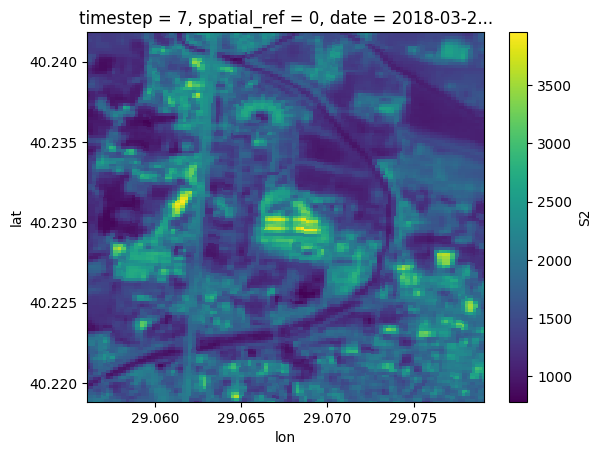

In [38]:
original_ds["S2"].isel(timestep=4, band=12).compute().plot.imshow()

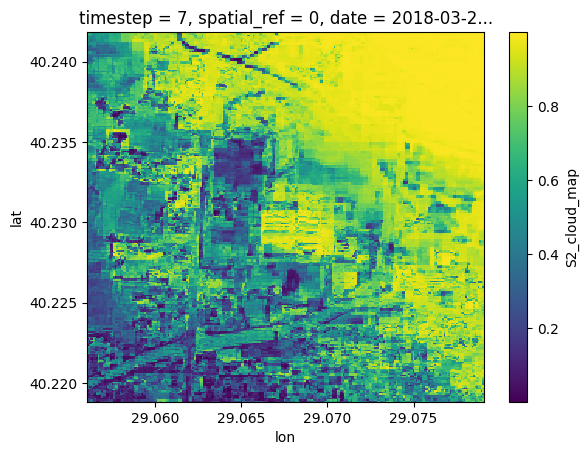

In [25]:
original_ds["S2_cloud_map"].isel(timestep=4).compute().plot.imshow()

In [26]:
from scipy.ndimage import gaussian_filter
detector = S2PixelCloudDetector(threshold=0.4, all_bands=True, average_over=4, dilation_size=2)

In [27]:
test_s2 = original_ds["S2"].isel(timestep=4).compute().data / 10000

In [41]:
test_cloud = detector.get_cloud_probability_maps(test_s2.clip(0, 1))
test_cloud[test_cloud < 0.5] = 0
test_cloud = gaussian_filter(test_cloud, sigma=2).astype(np.float32)

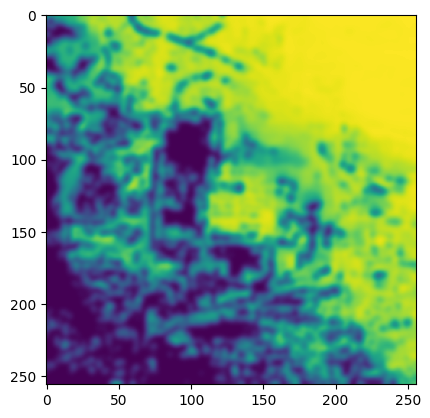

In [42]:
plt.imshow(test_cloud, vmin=0, vmax=1)

# Here we test pickling the datatree

In [ ]:
manager.save()

In [ ]:
manager = Sen12mscrtsDatasetManager(
    root_dir='/media/vlad/Extreme SSD/Datasets/Cloud_removal/SEN12MS-CR-TS/test/asiaWest_test/',
)

In [13]:
manager.load_from_file()

In [14]:
manager.data["ROIs1868/100/7/"]

DataTree('7', parent="100")
    Dimensions:           (timestep: 30, polarization: 2, lon: 256, lat: 256,
                           band: 13)
    Coordinates: (12/13)
      * timestep          (timestep) int64 0 1 2 3 4 5 6 7 ... 23 24 25 26 27 28 29
      * polarization      (polarization) <U2 'VV' 'VH'
      * lon               (lon) float64 28.85 28.85 28.85 ... 28.87 28.87 28.87
      * lat               (lat) float64 40.45 40.45 40.45 ... 40.43 40.43 40.43
        spatial_ref       int64 0
        y                 (lat) int64 0 1 2 3 4 5 6 ... 249 250 251 252 253 254 255
        ...                ...
        date              (timestep) <U10 '2018-01-03' '2018-01-15' ... '2018-12-17'
        filepath          (timestep) <U146 '/media/vlad/Extreme SSD/Datasets/Clou...
        directory         (timestep) <U98 '/media/vlad/Extreme SSD/Datasets/Cloud...
        filename          (timestep) <U47 's1_ROIs1868_100_ImgNo_0_2018-01-03_pat...
        patch             int64 7
      * band              (band) <U3 'B1' 'B2' 'B3' 'B4' ... 'B9' 'B10' 'B11' 'B12'
    Data variables:
        S1                (timestep, lat, lon, polarization) float64 dask.array<chunksize=(1, 256, 256, 2), meta=np.ndarray>
        S2                (timestep, lat, lon, band) uint16 dask.array<chunksize=(1, 256, 256, 13), meta=np.ndarray>
        cloud_mask        (timestep, lat, lon) float64 dask.array<chunksize=(1, 256, 256), meta=np.ndarray>
        cloud_percentage  (timestep) float64 dask.array<chunksize=(1,), meta=np.ndarray>

# Here we test calculating cloud percentage

In [25]:
detector = S2PixelCloudDetector(threshold=0.4, all_bands=True, average_over=4, dilation_size=2)

In [29]:
%%time

test_s2 = manager.data["ROIs1868/100/11/"]["S2"].compute()
for test_img in test_s2.values:
    detector.get_cloud_probability_maps(test_img)
print("Done")

Done
CPU times: user 52.5 s, sys: 75 ms, total: 52.6 s
Wall time: 14.3 s


In [34]:
%%time

manager.data["ROIs1868/100/12/"]["S2_cloud_map"].compute()
print("Done")

Done
CPU times: user 51.8 s, sys: 178 ms, total: 51.9 s
Wall time: 15.5 s


In [37]:
from distributed import Client
client = Client(processes=True, threads_per_worker=8)
client

/home/vlad/PycharmProjects/TUC/Masterarbeit/projects/spatiotemporal/venv/lib/python3.8/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 38163 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:38163/status,
Dashboard: http://127.0.0.1:38163/status,Workers: 1
Total threads: 8,Total memory: 15.54 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:34979,Workers: 1
Dashboard: http://127.0.0.1:38163/status,Total threads: 8
Started: Just now,Total memory: 15.54 GiB
Comm: tcp://127.0.0.1:34619,Total threads: 8
Dashboard: http://127.0.0.1:44053/status,Memory: 15.54 GiB
Nanny: tcp://127.0.0.1:46313,


In [38]:
%%time

manager.data["ROIs1868/100/12/"]["S2_cloud_map"].compute()
print("Done")

Done
CPU times: user 2.1 s, sys: 354 ms, total: 2.45 s
Wall time: 17 s


In [10]:
test_array = manager.data["ROIs1868/100/7/"]["S2_cloud_percentage"]
test_array

<xarray.DataArray 'S2_cloud_percentage' (timestep: 30)>
dask.array<concatenate, shape=(30,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * timestep     (timestep) int64 0 1 2 3 4 5 6 7 8 ... 22 23 24 25 26 27 28 29
    spatial_ref  int64 0
    date         (timestep) <U10 '2018-01-03' '2018-01-15' ... '2018-12-17'
    filepath     (timestep) <U146 '/media/vlad/Extreme SSD/Datasets/Cloud_rem...
    directory    (timestep) <U98 '/media/vlad/Extreme SSD/Datasets/Cloud_remo...
    filename     (timestep) <U47 's1_ROIs1868_100_ImgNo_0_2018-01-03_patch_7....
    patch        int64 7
Attributes:
    AREA_OR_POINT:             Area
    scale_factor:              1.0
    add_offset:                0.0
    modality:                  S2
    ROI:                       ROIs1868
    tile:                      100
    STATISTICS_VALID_PERCENT:  100

In [11]:
test_merged_cloud = xr.combine_by_coords(
    [
        ds["S2_cloud_percentage"].expand_dims({
            "ROI":   [ds["S2_cloud_percentage"].ROI], 
            "tile":  [ds["S2_cloud_percentage"].tile], 
            "patch": [ds["S2_cloud_percentage"].patch]
        })
        for ds 
        in manager.data.leaves
    ]
)
test_merged_cloud = test_merged_cloud["S2_cloud_percentage"]
test_merged_cloud

<xarray.DataArray 'S2_cloud_percentage' (ROI: 1, tile: 1, patch: 300,
                                         timestep: 30)>
dask.array<concatenate, shape=(1, 1, 300, 30), dtype=float64, chunksize=(1, 1, 1, 1), chunktype=numpy.ndarray>
Coordinates:
  * ROI          (ROI) object 'ROIs1868'
  * tile         (tile) int64 100
  * patch        (patch) int64 0 1 2 3 4 5 6 7 ... 293 294 295 296 297 298 299
  * timestep     (timestep) int64 0 1 2 3 4 5 6 7 8 ... 22 23 24 25 26 27 28 29
    spatial_ref  int64 0
    date         (timestep) <U10 '2018-01-03' '2018-01-15' ... '2018-12-17'
    filepath     (patch, timestep) <U148 '/media/vlad/Extreme SSD/Datasets/Cl...
    directory    (timestep) <U98 '/media/vlad/Extreme SSD/Datasets/Cloud_remo...
    filename     (patch, timestep) <U49 's1_ROIs1868_100_ImgNo_0_2018-01-03_p...
Attributes:
    AREA_OR_POINT:             Area
    scale_factor:              1.0
    add_offset:                0.0
    modality:                  S2
    ROI:                       ROIs1868
    tile:                      100
    STATISTICS_VALID_PERCENT:  100

In [12]:
test_merged_cloud = test_merged_cloud.stack(index=("ROI", "tile", "patch", "timestep"))
test_merged_cloud

<xarray.DataArray 'S2_cloud_percentage' (index: 9000)>
dask.array<reshape, shape=(9000,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    spatial_ref  int64 0
    date         (index) <U10 '2018-01-03' '2018-01-15' ... '2018-12-17'
    filepath     (index) <U148 '/media/vlad/Extreme SSD/Datasets/Cloud_remova...
    directory    (index) <U98 '/media/vlad/Extreme SSD/Datasets/Cloud_removal...
    filename     (index) <U49 's1_ROIs1868_100_ImgNo_0_2018-01-03_patch_0.tif...
  * index        (index) object MultiIndex
  * ROI          (index) object 'ROIs1868' 'ROIs1868' ... 'ROIs1868' 'ROIs1868'
  * tile         (index) int64 100 100 100 100 100 100 ... 100 100 100 100 100
  * patch        (index) int64 0 0 0 0 0 0 0 0 ... 299 299 299 299 299 299 299
  * timestep     (index) int64 0 1 2 3 4 5 6 7 8 ... 21 22 23 24 25 26 27 28 29
Attributes:
    AREA_OR_POINT:             Area
    scale_factor:              1.0
    add_offset:                0.0
    modality:                  S2
    ROI:                       ROIs1868
    tile:                      100
    STATISTICS_VALID_PERCENT:  100

In [14]:
%time
test_merged_cloud[:10].compute()

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 26 µs


<xarray.DataArray 'S2_cloud_percentage' (index: 10)>
array([0.99996697, 0.99996697, 0.99996697, 0.99996697, 0.99996697,
       0.99996697, 0.99996697, 0.99996697, 0.99996697, 0.99996697])
Coordinates:
    spatial_ref  int64 0
    date         (index) <U10 '2018-01-03' '2018-01-15' ... '2018-04-21'
    filepath     (index) <U148 '/media/vlad/Extreme SSD/Datasets/Cloud_remova...
    directory    (index) <U98 '/media/vlad/Extreme SSD/Datasets/Cloud_removal...
    filename     (index) <U49 's1_ROIs1868_100_ImgNo_0_2018-01-03_patch_0.tif...
  * index        (index) object MultiIndex
  * ROI          (index) object 'ROIs1868' 'ROIs1868' ... 'ROIs1868' 'ROIs1868'
  * tile         (index) int64 100 100 100 100 100 100 100 100 100 100
  * patch        (index) int64 0 0 0 0 0 0 0 0 0 0
  * timestep     (index) int64 0 1 2 3 4 5 6 7 8 9
Attributes:
    AREA_OR_POINT:             Area
    scale_factor:              1.0
    add_offset:                0.0
    modality:                  S2
    ROI:                       ROIs1868
    tile:                      100
    STATISTICS_VALID_PERCENT:  100

In [22]:
from distributed import Client
client = Client(processes=True)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 4,Total memory: 15.54 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:42245,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 15.54 GiB
Comm: tcp://127.0.0.1:42353,Total threads: 1
Dashboard: http://127.0.0.1:33437/status,Memory: 3.89 GiB
Nanny: tcp://127.0.0.1:39713,


In [ ]:
%time
test_merged_cloud[:100].compute()

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.82 µs


# Here we test building a pytorch dataset

# Here we test adding data to the datatree

In [20]:
dt = datatree.DataTree(name="SEN12MS-CR-TS")
dt

DataTree('SEN12MS-CR-TS', parent=None)

In [21]:
for key, value in tqdm(manager._data_found.items()):
    dt[key] = value
dt[key]

100%|████████████████████████████████████| 18000/18000 [00:28<00:00, 621.99it/s]


<xarray.DataArray 'S2' (timestep: 1, lat: 256, lon: 256, band: 13)>
dask.array<broadcast_to, shape=(1, 256, 256, 13), dtype=uint16, chunksize=(1, 256, 256, 13), chunktype=numpy.ndarray>
Coordinates:
  * timestep     (timestep) int64 21
  * lon          (lon) float64 28.85 28.85 28.85 28.85 ... 28.87 28.87 28.87
  * lat          (lat) float64 40.45 40.45 40.45 40.45 ... 40.43 40.43 40.43
    spatial_ref  int64 0
    date         (timestep) <U10 '2018-09-12'
    path         (timestep) <U146 '/media/vlad/Extreme SSD/Datasets/Cloud_rem...
    dir_path     (timestep) <U98 '/media/vlad/Extreme SSD/Datasets/Cloud_remo...
    filename     (timestep) <U47 's1_ROIs1868_100_ImgNo_21_2018-09-12_patch_7...
    patch        int64 7
  * band         (band) <U3 'B1' 'B2' 'B3' 'B4' 'B5' ... 'B9' 'B10' 'B11' 'B12'
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    modality:       S2
    ROI:            ROIs1868
    tile:           100

# Here we test merging by timestep

In [27]:
for roi, roi_tree in dt.children.items():
    for tile, tile_tree in roi_tree.children.items():
        for patch, patch_tree in tile_tree.children.items():
            print(len(patch_tree))
            break
        break
    break

30


In [26]:
tile

'ROIs1868'

In [28]:
def merge_timestep_inplace(datatree):

    n_items = len([node for node in dt.subtree if node.is_leaf])
    
    with tqdm(total=n_items, desc="Merge images over timestep") as pbar:
        
        for roi, roi_tree in datatree.children.items():
            for tile, tile_tree in roi_tree.children.items():
                for patch, patch_tree in tile_tree.children.items():
                    
                    pbar.update(len(patch_tree))                    
                    patch_tree.ds = xr.combine_by_coords( [ node.to_dataset() for node in patch_tree.values()], combine_attrs="drop_conflicts")
                    del patch_tree.children

In [29]:
merge_timestep_inplace(dt)

Merge images over timestep: 100%|██████████| 9000/9000 [00:33<00:00, 266.95it/s]


In [32]:
dt["ROIs1868/100/7/"].ds

<xarray.DatasetView>
Dimensions:       (timestep: 30, polarization: 2, lon: 256, lat: 256, band: 13)
Coordinates:
  * timestep      (timestep) int64 0 1 2 3 4 5 6 7 8 ... 22 23 24 25 26 27 28 29
  * polarization  (polarization) <U2 'VV' 'VH'
  * lon           (lon) float64 28.85 28.85 28.85 28.85 ... 28.87 28.87 28.87
  * lat           (lat) float64 40.45 40.45 40.45 40.45 ... 40.43 40.43 40.43
    spatial_ref   int64 0
    date          (timestep) <U10 '2018-01-03' '2018-01-15' ... '2018-12-17'
    path          (timestep) <U146 '/media/vlad/Extreme SSD/Datasets/Cloud_re...
    dir_path      (timestep) <U98 '/media/vlad/Extreme SSD/Datasets/Cloud_rem...
    filename      (timestep) <U47 's1_ROIs1868_100_ImgNo_0_2018-01-03_patch_7...
    patch         int64 7
  * band          (band) <U3 'B1' 'B2' 'B3' 'B4' 'B5' ... 'B9' 'B10' 'B11' 'B12'
Data variables:
    S1            (timestep, lat, lon, polarization) float64 dask.array<chunksize=(1, 256, 256, 2), meta=np.ndarray>
    S2            (timestep, lat, lon, band) uint16 dask.array<chunksize=(1, 256, 256, 13), meta=np.ndarray>

In [68]:
datatree.DatasetView

AttributeError: module 'datatree' has no attribute 'DatasetView'

# Here we test cloud cover

In [33]:
from s2cloudless import S2PixelCloudDetector
detector = S2PixelCloudDetector(threshold=0.4, all_bands=True, average_over=4, dilation_size=2)

/home/vlad/PycharmProjects/TUC/Masterarbeit/projects/spatiotemporal/venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [34]:
cloud = detector.get_cloud_probability_maps(dt["ROIs1868/100/7/"]["S2"].values/10000)
cloud.shape

(30, 256, 256)

In [36]:
test_dataset = xr.apply_ufunc(
    detector.get_cloud_probability_maps, 
    dt["ROIs1868/100/7/"]["S2"] / 10000,
    input_core_dims=[["lon", "lat", "band"]],
    output_core_dims=[["lon", "lat"]],
    exclude_dims=set(("band",)),
    dask='parallelized',
    output_dtypes=[dt["ROIs1868/100/7/"]["S2"].dtype]
)
test_dataset

<xarray.DataArray 'S2' (timestep: 30, lon: 256, lat: 256)>
dask.array<transpose, shape=(30, 256, 256), dtype=uint16, chunksize=(1, 256, 256), chunktype=numpy.ndarray>
Coordinates:
  * timestep     (timestep) int64 0 1 2 3 4 5 6 7 8 ... 22 23 24 25 26 27 28 29
  * lon          (lon) float64 28.85 28.85 28.85 28.85 ... 28.87 28.87 28.87
  * lat          (lat) float64 40.45 40.45 40.45 40.45 ... 40.43 40.43 40.43
    spatial_ref  int64 0
    date         (timestep) <U10 '2018-01-03' '2018-01-15' ... '2018-12-17'
    path         (timestep) <U146 '/media/vlad/Extreme SSD/Datasets/Cloud_rem...
    dir_path     (timestep) <U98 '/media/vlad/Extreme SSD/Datasets/Cloud_remo...
    filename     (timestep) <U47 's1_ROIs1868_100_ImgNo_0_2018-01-03_patch_7....
    patch        int64 7

In [37]:
def add_cloud_mask(dataset):
    dataset = (xr.Dataset)(dataset)
    s2 = dataset["S2"]
    s2 = s2.clip(min=0, max=10000, keep_attrs=True)
    s2 = s2/10000
    
    dataset["cloud_mask"] = xr.apply_ufunc(
        detector.get_cloud_probability_maps, 
        s2,
        input_core_dims=[["lon", "lat", "band"]],
        output_core_dims=[["lon", "lat"]],
        exclude_dims=set(("band",)),
        dask='parallelized',
        output_dtypes=[s2.dtype]
    )
    return dataset

In [38]:
dt = dt.map_over_subtree(add_cloud_mask)

In [50]:
dt["ROIs1868/100/7/"].sizes["lon"]

256

In [81]:
xr.str

AttributeError: module 'xarray' has no attribute 'str'

In [80]:
dt["ROIs1868/100/7/"]["S2"].timestep.astype(str)

<xarray.DataArray 'timestep' (timestep: 30)>
array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29'], dtype='<U21')
Coordinates:
  * timestep     (timestep) int64 0 1 2 3 4 5 6 7 8 ... 22 23 24 25 26 27 28 29
    spatial_ref  int64 0
    date         (timestep) <U10 '2018-01-03' '2018-01-15' ... '2018-12-17'
    path         (timestep) <U146 '/media/vlad/Extreme SSD/Datasets/Cloud_rem...
    dir_path     (timestep) <U98 '/media/vlad/Extreme SSD/Datasets/Cloud_remo...
    filename     (timestep) <U47 's1_ROIs1868_100_ImgNo_0_2018-01-03_patch_7....
    patch        int64 7

In [43]:
def add_cloud_percentage(dataset):
    dataset = (xr.Dataset)(dataset)
    dataset["cloud_percentage"] = dataset["cloud_mask"].mean(dim=["lon", "lat"])
    return dataset

In [44]:
dt = dt.map_over_subtree(add_cloud_percentage)

In [49]:
dt["ROIs1868__100__112"]["cloud_mask"].mean(dim=["x", "y"])

<xarray.DataArray 'cloud_mask' (timestep: 30)>
dask.array<mean_agg-aggregate, shape=(30,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * timestep     (timestep) int64 0 1 2 3 4 5 6 7 8 ... 22 23 24 25 26 27 28 29
    spatial_ref  int64 0
    date         (timestep) <U10 '2018-01-03' '2018-01-15' ... '2018-12-17'
    patch        int64 112

# Here we test flattening the tree

In [ ]:
def flatten_inplace(datatree, depth=1):
    
    if depth <= 0:
        return
        
    children_to_drop = []
    new_children = {}

    for child_name, child in datatree.children.items():

        children_to_drop.append(child_name)

        for grandchild_name, grandchild in child.children.items():

            new_name = child_name + "__" + grandchild_name
            new_children[new_name] = grandchild

    datatree.children = new_children
    
    # recursively flatten until desired depth is reached
    depth = depth - 1
    print(f"{depth}, flatten deeper")
    flatten_inplace(datatree, depth)

In [ ]:
flatten_inplace(dt)
dt

# Here we test all other stuff

In [4]:
reader = ImageReader(manager=manager, image_path=example_s1_image)

In [5]:
reader.image["S1"]

<xarray.DataArray 'S1' (timestep: 1, polarization: 2, y: 256, x: 256)>
dask.array<broadcast_to, shape=(1, 2, 256, 256), dtype=float64, chunksize=(1, 2, 256, 256), chunktype=numpy.ndarray>
Coordinates:
  * timestep      (timestep) int64 12
  * polarization  (polarization) <U2 'VV' 'VH'
  * x             (x) float64 28.83 28.83 28.83 28.83 ... 28.85 28.85 28.85
  * y             (y) float64 40.24 40.24 40.24 40.24 ... 40.22 40.22 40.22
    spatial_ref   int64 0
  * date          (timestep) <U10 '2018-05-27'
    patch         int64 186
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    path:           /media/vlad/Extreme SSD/Datasets/Cloud_removal/SEN12MS-CR...
    dir_path:       /media/vlad/Extreme SSD/Datasets/Cloud_removal/SEN12MS-CR...
    filename:       s1_ROIs1868_100_ImgNo_12_2018-05-27_patch_186.tif
    modality:       S1
    ROI:            ROIs1868
    tile:           100

In [17]:
def read(image_path):
    reader = ImageReader(manager=manager, image_path=image_path)
    lazy_image = rxr.open_rasterio(reader.path, cache=False, chunks={})
    lazy_image = lazy_image.rename(reader.image_type)
    lazy_image = lazy_image.expand_dims({"timestep": [reader.metadata["timestep"]]})
    lazy_image = lazy_image.assign_coords({"date": ("timestep", [reader.metadata["date"]])})    
    
    for metadata_type, metadata in reader.metadata.items():
        if metadata_type in ["timestep", "date"]:
            pass
        elif metadata_type in reader.manager.config['dataset_index']:
            lazy_image = lazy_image.assign_coords({metadata_type: reader.metadata[metadata_type]})
        else:
            lazy_image.attrs[metadata_type] = metadata
            
    lazy_image = lazy_image.assign_coords({"patch_x": lazy_image.patch % 20 })
    lazy_image = lazy_image.assign_coords({"patch_y": lazy_image.patch // 20})
    
    return lazy_image

In [14]:
import warnings
def read(image_path):
    reader = ImageReader(manager=manager, image_path=image_path)
    
    # read as dask array
    lazy_image = rxr.open_rasterio(reader.path, cache=False, chunks={})
    
    # rename DataArray
    lazy_image = lazy_image.rename(reader.image_type)
    
    # add timestep as dimension with coordinate
    lazy_image = lazy_image.expand_dims({"timestep": [reader.metadata["timestep"]]})

    # add 'date' as coordinate, create index so that we can use it to select data. 
    lazy_image = lazy_image.assign_coords({"date": ("timestep", [reader.metadata["date"]])})
    # lazy_image = lazy_image.set_xindex("date")

    # add patch as coordinate
    lazy_image = lazy_image.assign_coords({"patch": reader.metadata["patch"]})

    # assign new band names
    lazy_image = lazy_image.assign_coords(band=reader.manager.config['bands'][reader.image_type])

    # rename the coordinate for bands if necessary, suppress occasional warnings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        lazy_image = lazy_image.rename({"band": reader.manager.config['band_definition'][reader.image_type]})

    # set attributes
    lazy_image.attrs["path"] = reader.path
    lazy_image.attrs["dir_path"] = reader.dir_path
    lazy_image.attrs["filename"] = reader.filename
    for metadata_type, metadata in reader.metadata.items():
        if metadata_type in lazy_image.coords:
            continue
        lazy_image.attrs[metadata_type] = metadata

    lazy_image = lazy_image.to_dataset()
    """
    """
    return lazy_image

In [15]:
example_1='/media/vlad/Extreme SSD/Datasets/Cloud_removal/SEN12MS-CR-TS/test/asiaWest_test/ROIs1868/100/S1/12/s1_ROIs1868_100_ImgNo_12_2018-05-27_patch_186.tif'
example_2='/media/vlad/Extreme SSD/Datasets/Cloud_removal/SEN12MS-CR-TS/test/asiaWest_test/ROIs1868/100/S1/12/s1_ROIs1868_100_ImgNo_12_2018-05-27_patch_187.tif'
example_3='/media/vlad/Extreme SSD/Datasets/Cloud_removal/SEN12MS-CR-TS/test/asiaWest_test/ROIs1868/100/S1/12/s1_ROIs1868_100_ImgNo_12_2018-05-27_patch_206.tif'
example_4='/media/vlad/Extreme SSD/Datasets/Cloud_removal/SEN12MS-CR-TS/test/asiaWest_test/ROIs1868/100/S1/12/s1_ROIs1868_100_ImgNo_12_2018-05-27_patch_207.tif'

In [16]:
lazy_1 = read(example_1)
lazy_2 = read(example_2)
lazy_3 = read(example_3)
lazy_4 = read(example_4)

In [17]:
lazy_1

<xarray.Dataset>
Dimensions:       (timestep: 1, polarization: 2, x: 256, y: 256)
Coordinates:
  * timestep      (timestep) int64 12
  * polarization  (polarization) <U2 'VV' 'VH'
  * x             (x) float64 28.83 28.83 28.83 28.83 ... 28.85 28.85 28.85
  * y             (y) float64 40.24 40.24 40.24 40.24 ... 40.22 40.22 40.22
    spatial_ref   int64 0
    date          (timestep) <U10 '2018-05-27'
    patch         int64 186
Data variables:
    S1            (timestep, polarization, y, x) float64 dask.array<chunksize=(1, 2, 256, 256), meta=np.ndarray>

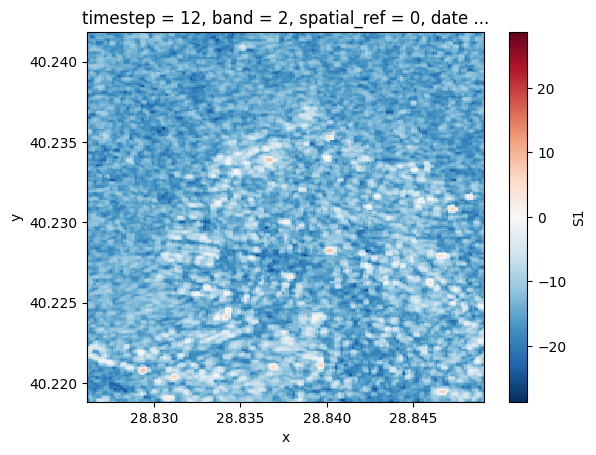

In [12]:
lazy_1.sel(timestep=12, band=2).plot.imshow()

In [13]:
combined = xr.combine_by_coords([lazy_1, lazy_2, lazy_3, lazy_4])
combined

<xarray.Dataset>
Dimensions:      (timestep: 1, band: 2, x: 512, y: 512)
Coordinates:
  * timestep     (timestep) int64 12
  * band         (band) int64 1 2
  * x            (x) float64 28.83 28.83 28.83 28.83 ... 28.87 28.87 28.87 28.87
  * y            (y) float64 40.24 40.24 40.24 40.24 ... 40.2 40.2 40.2 40.2
    spatial_ref  int64 0
    date         (timestep) <U10 '2018-05-27'
    ROI          <U8 'ROIs1868'
    tile         int64 100
    patch        (y, x) int64 186 186 186 186 186 186 ... 207 207 207 207 207
    patch_x      (x) int64 6 6 6 6 6 6 6 6 6 6 6 6 6 ... 7 7 7 7 7 7 7 7 7 7 7 7
    patch_y      (y) int64 9 9 9 9 9 9 9 9 9 9 ... 10 10 10 10 10 10 10 10 10 10
Data variables:
    S1           (timestep, band, y, x) float64 dask.array<chunksize=(1, 2, 256, 256), meta=np.ndarray>

In [14]:
combined = combined.set_xindex("patch_x")
combined = combined.set_xindex("patch_y")

In [16]:
combined["S1"].where(combined["S1"]==21)

ValueError: cannot re-index or align objects with conflicting indexes found for the following dimensions: 'x' (2 conflicting indexes), 'y' (2 conflicting indexes)
Conflicting indexes may occur when
- they relate to different sets of coordinate and/or dimension names
- they don't have the same type
- they may be used to reindex data along common dimensions

In [17]:
combined["S1"]

<xarray.DataArray 'S1' (timestep: 1, band: 2, y: 512, x: 512)>
dask.array<concatenate, shape=(1, 2, 512, 512), dtype=float64, chunksize=(1, 2, 256, 256), chunktype=numpy.ndarray>
Coordinates:
  * timestep     (timestep) int64 12
  * band         (band) int64 1 2
  * x            (x) float64 28.83 28.83 28.83 28.83 ... 28.87 28.87 28.87 28.87
  * y            (y) float64 40.24 40.24 40.24 40.24 ... 40.2 40.2 40.2 40.2
    spatial_ref  int64 0
    date         (timestep) <U10 '2018-05-27'
    ROI          <U8 'ROIs1868'
    tile         int64 100
    patch        (y, x) int64 186 186 186 186 186 186 ... 207 207 207 207 207
  * patch_x      (x) int64 6 6 6 6 6 6 6 6 6 6 6 6 6 ... 7 7 7 7 7 7 7 7 7 7 7 7
  * patch_y      (y) int64 9 9 9 9 9 9 9 9 9 9 ... 10 10 10 10 10 10 10 10 10 10
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    modality:       S1

In [27]:
test = combined.isel(x=slice(200, 300), y=slice(200, 300), timestep=0, band=1)["S1"] + 11.0

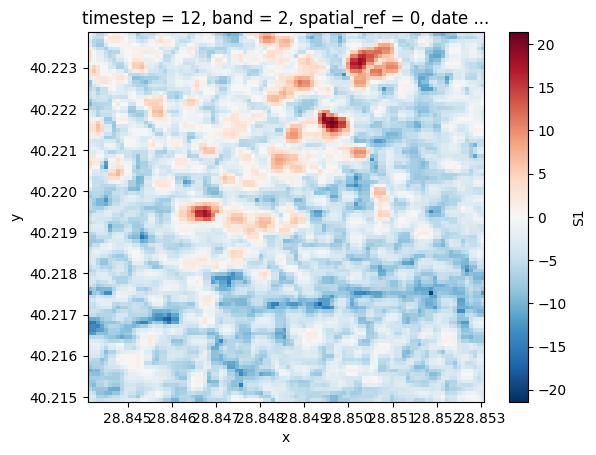

In [29]:
test.plot.imshow()

In [44]:
reader.manager.config['bands'][reader.image_type]

['VV', 'VH']

In [45]:
lazy_image = lazy_image.expand_dims({"timestep": [reader.metadata["timestep"]]})




In [46]:
lazy_image = lazy_image.assign_coords({"date": ("timestep", [reader.metadata["date"]])})

In [47]:
for metadata_type, metadata in reader.metadata.items():
    if metadata_type in ["timestep", "date"]:
        pass
    elif metadata_type == "date" or metadata_type in reader.manager.config['dataset_index']:
        lazy_image = lazy_image.assign_coords({metadata_type: reader.metadata[metadata_type]})
    else:
        lazy_image.attrs[metadata_type] = metadata

In [48]:
lazy_image

<xarray.DataArray 'S1' (timestep: 1, band: 2, y: 256, x: 256)>
dask.array<broadcast_to, shape=(1, 2, 256, 256), dtype=float64, chunksize=(1, 2, 256, 256), chunktype=numpy.ndarray>
Coordinates:
  * timestep     (timestep) int64 12
  * band         (band) int64 1 2
  * x            (x) float64 28.83 28.83 28.83 28.83 ... 28.85 28.85 28.85 28.85
  * y            (y) float64 40.24 40.24 40.24 40.24 ... 40.22 40.22 40.22 40.22
    spatial_ref  int64 0
    date         (timestep) <U10 '2018-05-27'
    ROI          <U8 'ROIs1868'
    tile         int64 100
    patch        int64 186
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    modality:       S1

In [ ]:
merge_arrays

In [20]:
reader.image["S1"]

<xarray.DataArray 'S1' (polarization: 2, y: 256, x: 256)>
dask.array<open_rasterio-6420567e6f8e3f63010760c623805d05<this-array>, shape=(2, 256, 256), dtype=float64, chunksize=(2, 256, 256), chunktype=numpy.ndarray>
Coordinates:
  * polarization  (polarization) <U2 'VV' 'VH'
  * x             (x) float64 28.83 28.83 28.83 28.83 ... 28.85 28.85 28.85
  * y             (y) float64 40.24 40.24 40.24 40.24 ... 40.22 40.22 40.22
    spatial_ref   int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    path:           /media/vlad/Extreme SSD/Datasets/Cloud_removal/SEN12MS-CR...
    dir_path:       /media/vlad/Extreme SSD/Datasets/Cloud_removal/SEN12MS-CR...
    filename:       s1_ROIs1868_100_ImgNo_12_2018-05-27_patch_186.tif
    modality:       S1
    ROI:            ROIs1868
    tile:           100
    timestep:       12
    date:           2018-05-27
    patch:          186